<a href="https://colab.research.google.com/github/sahilpatil6305/Exploratory-Project/blob/main/Linked_Prediction_2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import networkx as nx
import numpy as np
import matplotlib.pyplot as plt
from sklearn.metrics import roc_curve, auc
from itertools import combinations
from sklearn.model_selection import train_test_split


"""
### Les Misérables Dataset  

**Les Misérables** is a classic novel by **Victor Hugo**, published in **1862**, depicting themes of justice, redemption, and revolution in 19th-century France. The **Les Misérables dataset** is a **social network graph** representing **character co-occurrences** within the novel.  

- **Nodes (Vertices):** Each node represents a **character** in the novel.  
- **Edges (Links):** Each edge represents a **co-occurrence** of two characters in the same chapter.  
- **Edge Weights:** The **weight** of an edge indicates the **frequency** of co-occurrences between two characters.  

This dataset is widely used in **social network analysis, link prediction, and community detection**.  

The **Les Misérables dataset**, as provided by **NetworkX**, contains:  

- **Nodes (Characters):** 77  
- **Edges (Co-occurrences):** 254  

This means the graph represents **77 characters** from the novel, and there are **254 connections (edges)** between them based on their co-occurrences in the same chapter.  
"""


In [ ]:
import networkx as nx
import numpy as np
import matplotlib.pyplot as plt
from itertools import combinations
from sklearn.model_selection import train_test_split
from sklearn.metrics import roc_curve, auc


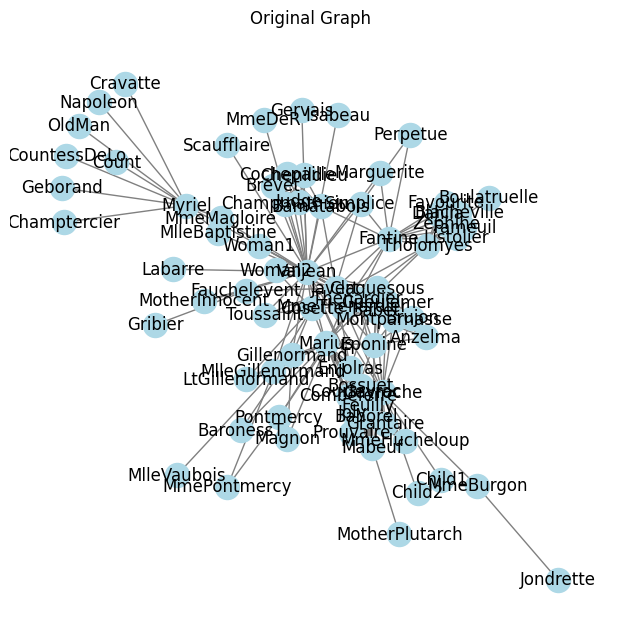

In [ ]:
# Load Les Misérables dataset
graph =  nx.les_miserables_graph()

# Plot original graph
plt.figure(figsize=(6, 6))
nx.draw(graph, with_labels=True, node_color='lightblue', edge_color='gray')
plt.title("Original Graph")
plt.show()


In [ ]:
# List all nodes in the graph
all_nodes = list(graph.nodes())
print(f"All nodes in the graph: {all_nodes}")

# List all edges in the graph
all_edges = list(graph.edges())
print(f"All edges in the original graph: {all_edges}")


All nodes in the graph: ['Napoleon', 'Myriel', 'MlleBaptistine', 'MmeMagloire', 'CountessDeLo', 'Geborand', 'Champtercier', 'Cravatte', 'Count', 'OldMan', 'Valjean', 'Labarre', 'Marguerite', 'MmeDeR', 'Isabeau', 'Gervais', 'Listolier', 'Tholomyes', 'Fameuil', 'Blacheville', 'Favourite', 'Dahlia', 'Zephine', 'Fantine', 'MmeThenardier', 'Thenardier', 'Cosette', 'Javert', 'Fauchelevent', 'Bamatabois', 'Perpetue', 'Simplice', 'Scaufflaire', 'Woman1', 'Judge', 'Champmathieu', 'Brevet', 'Chenildieu', 'Cochepaille', 'Pontmercy', 'Boulatruelle', 'Eponine', 'Anzelma', 'Woman2', 'MotherInnocent', 'Gribier', 'MmeBurgon', 'Jondrette', 'Gavroche', 'Gillenormand', 'Magnon', 'MlleGillenormand', 'MmePontmercy', 'MlleVaubois', 'LtGillenormand', 'Marius', 'BaronessT', 'Mabeuf', 'Enjolras', 'Combeferre', 'Prouvaire', 'Feuilly', 'Courfeyrac', 'Bahorel', 'Bossuet', 'Joly', 'Grantaire', 'MotherPlutarch', 'Gueulemer', 'Babet', 'Claquesous', 'Montparnasse', 'Toussaint', 'Child1', 'Child2', 'Brujon', 'MmeHuche

In [ ]:
# Select 20% of edges to remove
edges_to_remove = np.random.choice(len(all_edges), int(0.2 * len(all_edges)), replace=False)
specific_edges_to_remove = [all_edges[i] for i in edges_to_remove]
print(f"Edges selected for removal: {specific_edges_to_remove}")

# Remove specific edges for link prediction
def remove_specific_edges(graph, edges_to_remove):
    graph.remove_edges_from(edges_to_remove)
    return graph, edges_to_remove

graph, removed_edges = remove_specific_edges(graph, specific_edges_to_remove)


Edges selected for removal: [('Combeferre', 'Bahorel'), ('Gavroche', 'Child2'), ('Fantine', 'Javert'), ('Courfeyrac', 'MmeHucheloup'), ('Javert', 'Bamatabois'), ('Bossuet', 'Grantaire'), ('Feuilly', 'Bahorel'), ('Feuilly', 'Courfeyrac'), ('Bossuet', 'MmeHucheloup'), ('Eponine', 'Marius'), ('Dahlia', 'Zephine'), ('Myriel', 'MlleBaptistine'), ('Gueulemer', 'Babet'), ('Claquesous', 'Montparnasse'), ('Valjean', 'Woman2'), ('Dahlia', 'Fantine'), ('Bamatabois', 'Brevet'), ('Pontmercy', 'MmePontmercy'), ('Bamatabois', 'Judge'), ('Valjean', 'Chenildieu'), ('MlleBaptistine', 'Valjean'), ('Javert', 'Woman1'), ('Eponine', 'Anzelma'), ('Gillenormand', 'MlleGillenormand'), ('Tholomyes', 'Fantine'), ('Listolier', 'Blacheville'), ('Combeferre', 'Feuilly'), ('Blacheville', 'Zephine'), ('MmeThenardier', 'Eponine'), ('Cosette', 'Marius'), ('Gavroche', 'Gueulemer'), ('Valjean', 'Bamatabois'), ('Bahorel', 'Grantaire'), ('Marius', 'BaronessT'), ('Bahorel', 'Joly'), ('Gavroche', 'Child1'), ('Gavroche', 'Cou

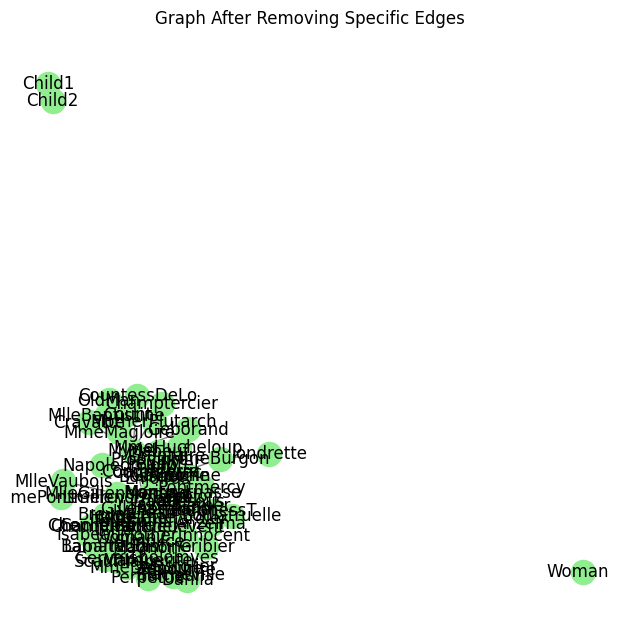

In [ ]:

# Plot graph after removing edges
plt.figure(figsize=(6, 6))
nx.draw(graph, with_labels=True, node_color='lightgreen', edge_color='gray')
plt.title("Graph After Removing Specific Edges")
plt.show()


In [ ]:
# Extract edges and non-edges
edges = list(graph.edges())
non_edges = list(combinations(graph.nodes(), 2))
non_edges = [pair for pair in non_edges if pair not in edges and pair[::-1] not in edges]

# Split into training and testing sets
train_edges, test_edges = train_test_split(edges, test_size=0.3, random_state=42)
train_graph = nx.Graph()
train_graph.add_nodes_from(graph.nodes())  # Preserve all nodes
train_graph.add_edges_from(train_edges)


In [ ]:

# Function to compute link prediction scores
def compute_scores(graph, test_set, metric):
    scores = []
    for u, v in test_set:
        if u not in graph or v not in graph:
            scores.append(0)  # Assign a default score if nodes are missing
            continue

        if metric == "adamic_adar":
            score = sum(1 / np.log(graph.degree(w)) for w in nx.common_neighbors(graph, u, v) if graph.degree(w) > 1)
        elif metric == "jaccard":
            neighbors_u = set(graph.neighbors(u))
            neighbors_v = set(graph.neighbors(v))
            score = len(neighbors_u & neighbors_v) / len(neighbors_u | neighbors_v) if len(neighbors_u | neighbors_v) > 0 else 0
        elif metric == "preferential_attachment":
            score = graph.degree(u) * graph.degree(v)
        elif metric == "common_neighbors":
            score = len(list(nx.common_neighbors(graph, u, v)))
        elif metric == "salton_index":
            neighbors_u = set(graph.neighbors(u))
            neighbors_v = set(graph.neighbors(v))
            denominator = np.sqrt(len(neighbors_u) * len(neighbors_v))
            score = len(neighbors_u & neighbors_v) / denominator if denominator > 0 else 0
        elif metric == "hub_promoted_index":
            neighbors_u = set(graph.neighbors(u))
            neighbors_v = set(graph.neighbors(v))
            min_degree = min(len(neighbors_u), len(neighbors_v))
            score = len(neighbors_u & neighbors_v) / min_degree if min_degree > 0 else 0
        else:
            raise ValueError("Unknown metric")

        scores.append(score)

    return np.array(scores)


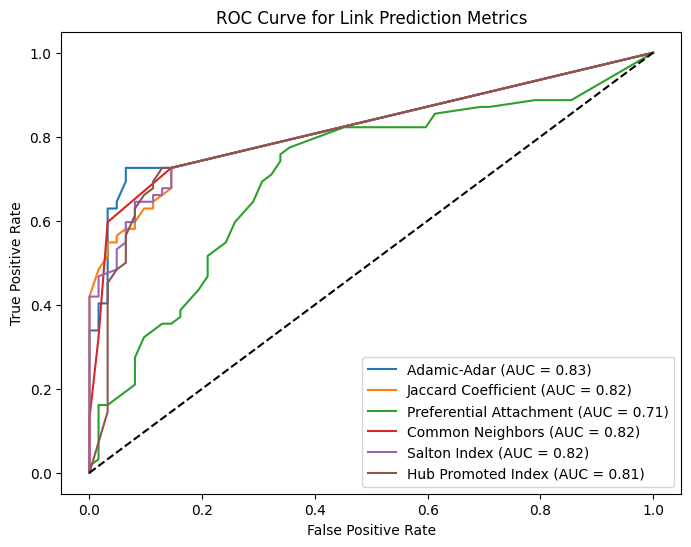

In [ ]:


# Compute scores
adamic_adar_scores = compute_scores(train_graph, test_edges, "adamic_adar")
jaccard_scores = compute_scores(train_graph, test_edges, "jaccard")
pref_attach_scores = compute_scores(train_graph, test_edges, "preferential_attachment")
cn_scores = compute_scores(train_graph, test_edges, "common_neighbors")
salton_scores = compute_scores(train_graph, test_edges, "salton_index")
hpi_scores = compute_scores(train_graph, test_edges, "hub_promoted_index")

# Generate ground truth labels
ground_truth = [1] * len(test_edges) + [0] * len(test_edges)
random_non_edges = np.random.choice(len(non_edges), len(test_edges), replace=False)
test_non_edges = [non_edges[i] for i in random_non_edges]

# Compute scores for non-edges
adamic_adar_scores = np.concatenate([adamic_adar_scores, compute_scores(train_graph, test_non_edges, "adamic_adar")])
jaccard_scores = np.concatenate([jaccard_scores, compute_scores(train_graph, test_non_edges, "jaccard")])
pref_attach_scores = np.concatenate([pref_attach_scores, compute_scores(train_graph, test_non_edges, "preferential_attachment")])
cn_scores = np.concatenate([cn_scores, compute_scores(train_graph, test_non_edges, "common_neighbors")])
salton_scores = np.concatenate([salton_scores, compute_scores(train_graph, test_non_edges, "salton_index")])
hpi_scores = np.concatenate([hpi_scores, compute_scores(train_graph, test_non_edges, "hub_promoted_index")])

# Plot ROC Curves
def plot_roc_curve(y_true, y_scores, method):
    fpr, tpr, _ = roc_curve(y_true, y_scores)
    roc_auc = auc(fpr, tpr)
    plt.plot(fpr, tpr, label=f'{method} (AUC = {roc_auc:.2f})')

plt.figure(figsize=(8, 6))
plot_roc_curve(ground_truth, adamic_adar_scores, "Adamic-Adar")
plot_roc_curve(ground_truth, jaccard_scores, "Jaccard Coefficient")
plot_roc_curve(ground_truth, pref_attach_scores, "Preferential Attachment")
plot_roc_curve(ground_truth, cn_scores, "Common Neighbors")
plot_roc_curve(ground_truth, salton_scores, "Salton Index")
plot_roc_curve(ground_truth, hpi_scores, "Hub Promoted Index")

plt.plot([0, 1], [0, 1], 'k--')
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.title("ROC Curve for Link Prediction Metrics")
plt.legend()
plt.show()


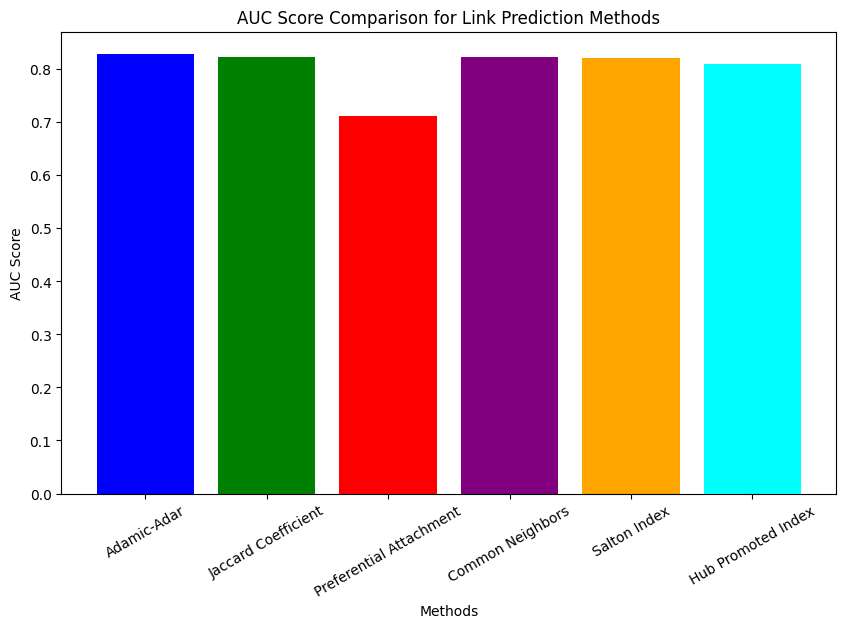

In [ ]:

import numpy as np
import matplotlib.pyplot as plt
from sklearn.metrics import roc_curve, auc

# Compute AUC scores for all methods
auc_scores = {
    "Adamic-Adar": auc(roc_curve(ground_truth, adamic_adar_scores)[0], roc_curve(ground_truth, adamic_adar_scores)[1]),
    "Jaccard Coefficient": auc(roc_curve(ground_truth, jaccard_scores)[0], roc_curve(ground_truth, jaccard_scores)[1]),
    "Preferential Attachment": auc(roc_curve(ground_truth, pref_attach_scores)[0], roc_curve(ground_truth, pref_attach_scores)[1]),
    "Common Neighbors": auc(roc_curve(ground_truth, cn_scores)[0], roc_curve(ground_truth, cn_scores)[1]),
    "Salton Index": auc(roc_curve(ground_truth, salton_scores)[0], roc_curve(ground_truth, salton_scores)[1]),
    "Hub Promoted Index": auc(roc_curve(ground_truth, hpi_scores)[0], roc_curve(ground_truth, hpi_scores)[1])
}

# Extract methods and corresponding AUC scores
methods = list(auc_scores.keys())
scores = list(auc_scores.values())

# Plot bar graph
plt.figure(figsize=(10, 6))
plt.bar(methods, scores, color=["blue", "green", "red", "purple", "orange", "cyan"])
plt.xlabel("Methods")
plt.ylabel("AUC Score")
plt.title("AUC Score Comparison for Link Prediction Methods")
plt.xticks(rotation=30)  # Rotate labels for better readability
plt.show()


"""
### Karate Club Graph  

The **Karate Club Graph** is a well-known **social network dataset** collected by **Wayne Zachary** in **1977**. It represents the **friendship network** of 34 members of a **karate club** at a U.S. university.  

- **Nodes (Vertices):**  
  - Each node represents a **club member**.  
- **Edges (Links):**  
  - An edge exists between two members if they **interacted** outside the club.  

This dataset is widely used in **community detection, graph clustering, and social network analysis**.  

The **Karate Club dataset**, as provided by **NetworkX**, contains:  

- **Nodes:** 34 (Club members)  
- **Edges:** 78 (Friendship connections)  

This means the graph consists of **34 nodes** and **78 edges**, where edges indicate friendship ties between club members.  

Additionally, due to a **dispute** between the **club president** and the **instructor**, the club **split into two factions**, making it an ideal dataset for testing **community detection algorithms**.  
"""


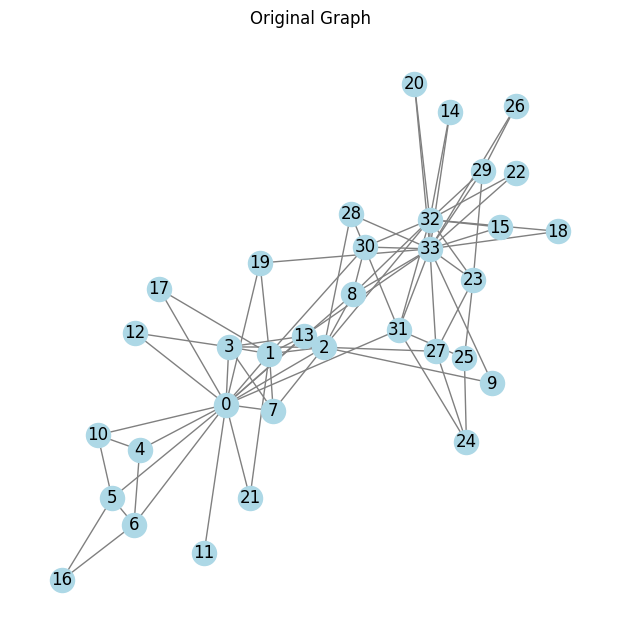

In [ ]:
# Load Karate dataset
graph =  nx.karate_club_graph()

# Plot original graph
plt.figure(figsize=(6, 6))
nx.draw(graph, with_labels=True, node_color='lightblue', edge_color='gray')
plt.title("Original Graph")
plt.show()


In [ ]:
# List all nodes in the graph
all_nodes = list(graph.nodes())
print(f"All nodes in the graph: {all_nodes}")

# List all edges in the graph
all_edges = list(graph.edges())
print(f"All edges in the original graph: {all_edges}")


All nodes in the graph: [0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33]
All edges in the original graph: [(0, 1), (0, 2), (0, 3), (0, 4), (0, 5), (0, 6), (0, 7), (0, 8), (0, 10), (0, 11), (0, 12), (0, 13), (0, 17), (0, 19), (0, 21), (0, 31), (1, 2), (1, 3), (1, 7), (1, 13), (1, 17), (1, 19), (1, 21), (1, 30), (2, 3), (2, 7), (2, 8), (2, 9), (2, 13), (2, 27), (2, 28), (2, 32), (3, 7), (3, 12), (3, 13), (4, 6), (4, 10), (5, 6), (5, 10), (5, 16), (6, 16), (8, 30), (8, 32), (8, 33), (9, 33), (13, 33), (14, 32), (14, 33), (15, 32), (15, 33), (18, 32), (18, 33), (19, 33), (20, 32), (20, 33), (22, 32), (22, 33), (23, 25), (23, 27), (23, 29), (23, 32), (23, 33), (24, 25), (24, 27), (24, 31), (25, 31), (26, 29), (26, 33), (27, 33), (28, 31), (28, 33), (29, 32), (29, 33), (30, 32), (30, 33), (31, 32), (31, 33), (32, 33)]


In [ ]:
# Select 20% of edges to remove
edges_to_remove = np.random.choice(len(all_edges), int(0.2 * len(all_edges)), replace=False)
specific_edges_to_remove = [all_edges[i] for i in edges_to_remove]
print(f"Edges selected for removal: {specific_edges_to_remove}")

# Remove specific edges for link prediction
def remove_specific_edges(graph, edges_to_remove):
    graph.remove_edges_from(edges_to_remove)
    return graph, edges_to_remove

graph, removed_edges = remove_specific_edges(graph, specific_edges_to_remove)


Edges selected for removal: [(19, 33), (26, 29), (0, 10), (30, 32), (8, 32), (0, 5), (0, 13), (5, 10), (0, 7), (30, 33), (20, 32), (25, 31), (0, 8), (0, 6), (31, 33)]


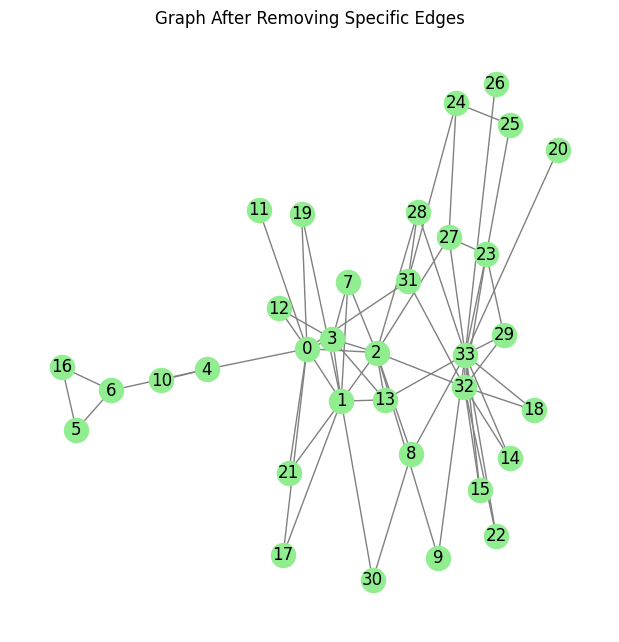

In [ ]:

# Plot graph after removing edges
plt.figure(figsize=(6, 6))
nx.draw(graph, with_labels=True, node_color='lightgreen', edge_color='gray')
plt.title("Graph After Removing Specific Edges")
plt.show()


In [ ]:


# Extract edges and non-edges
edges = list(graph.edges())
non_edges = list(combinations(graph.nodes(), 2))
non_edges = [pair for pair in non_edges if pair not in edges and pair[::-1] not in edges]

# Split into training and testing sets
train_edges, test_edges = train_test_split(edges, test_size=0.3, random_state=42)
train_graph = nx.Graph()
train_graph.add_nodes_from(graph.nodes())  # Preserve all nodes
train_graph.add_edges_from(train_edges)


In [ ]:

# Function to compute link prediction scores
def compute_scores(graph, test_set, metric):
    scores = []
    for u, v in test_set:
        if u not in graph or v not in graph:
            scores.append(0)  # Assign a default score if nodes are missing
            continue

        if metric == "adamic_adar":
            score = sum(1 / np.log(graph.degree(w)) for w in nx.common_neighbors(graph, u, v) if graph.degree(w) > 1)
        elif metric == "jaccard":
            neighbors_u = set(graph.neighbors(u))
            neighbors_v = set(graph.neighbors(v))
            score = len(neighbors_u & neighbors_v) / len(neighbors_u | neighbors_v) if len(neighbors_u | neighbors_v) > 0 else 0
        elif metric == "preferential_attachment":
            score = graph.degree(u) * graph.degree(v)
        elif metric == "common_neighbors":
            score = len(list(nx.common_neighbors(graph, u, v)))
        elif metric == "salton_index":
            neighbors_u = set(graph.neighbors(u))
            neighbors_v = set(graph.neighbors(v))
            denominator = np.sqrt(len(neighbors_u) * len(neighbors_v))
            score = len(neighbors_u & neighbors_v) / denominator if denominator > 0 else 0
        elif metric == "hub_promoted_index":
            neighbors_u = set(graph.neighbors(u))
            neighbors_v = set(graph.neighbors(v))
            min_degree = min(len(neighbors_u), len(neighbors_v))
            score = len(neighbors_u & neighbors_v) / min_degree if min_degree > 0 else 0
        else:
            raise ValueError("Unknown metric")

        scores.append(score)

    return np.array(scores)


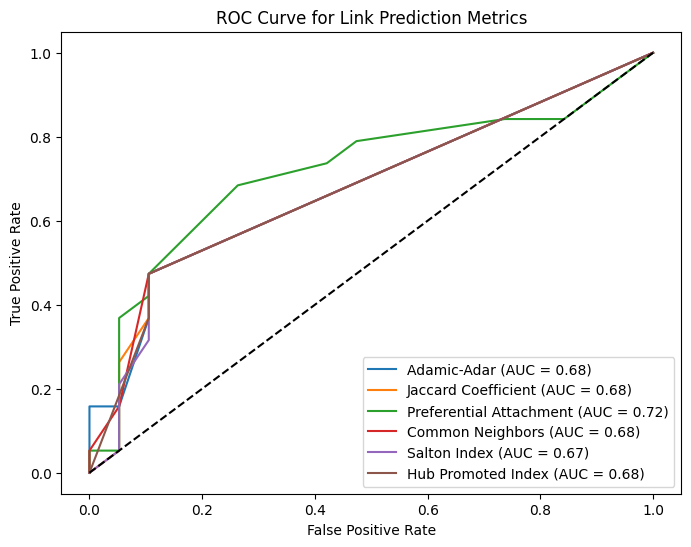

In [ ]:

# Compute scores
adamic_adar_scores = compute_scores(train_graph, test_edges, "adamic_adar")
jaccard_scores = compute_scores(train_graph, test_edges, "jaccard")
pref_attach_scores = compute_scores(train_graph, test_edges, "preferential_attachment")
cn_scores = compute_scores(train_graph, test_edges, "common_neighbors")
salton_scores = compute_scores(train_graph, test_edges, "salton_index")
hpi_scores = compute_scores(train_graph, test_edges, "hub_promoted_index")

# Generate ground truth labels
ground_truth = [1] * len(test_edges) + [0] * len(test_edges)
random_non_edges = np.random.choice(len(non_edges), len(test_edges), replace=False)
test_non_edges = [non_edges[i] for i in random_non_edges]

# Compute scores for non-edges
adamic_adar_scores = np.concatenate([adamic_adar_scores, compute_scores(train_graph, test_non_edges, "adamic_adar")])
jaccard_scores = np.concatenate([jaccard_scores, compute_scores(train_graph, test_non_edges, "jaccard")])
pref_attach_scores = np.concatenate([pref_attach_scores, compute_scores(train_graph, test_non_edges, "preferential_attachment")])
cn_scores = np.concatenate([cn_scores, compute_scores(train_graph, test_non_edges, "common_neighbors")])
salton_scores = np.concatenate([salton_scores, compute_scores(train_graph, test_non_edges, "salton_index")])
hpi_scores = np.concatenate([hpi_scores, compute_scores(train_graph, test_non_edges, "hub_promoted_index")])

# Plot ROC Curves
def plot_roc_curve(y_true, y_scores, method):
    fpr, tpr, _ = roc_curve(y_true, y_scores)
    roc_auc = auc(fpr, tpr)
    plt.plot(fpr, tpr, label=f'{method} (AUC = {roc_auc:.2f})')

plt.figure(figsize=(8, 6))
plot_roc_curve(ground_truth, adamic_adar_scores, "Adamic-Adar")
plot_roc_curve(ground_truth, jaccard_scores, "Jaccard Coefficient")
plot_roc_curve(ground_truth, pref_attach_scores, "Preferential Attachment")
plot_roc_curve(ground_truth, cn_scores, "Common Neighbors")
plot_roc_curve(ground_truth, salton_scores, "Salton Index")
plot_roc_curve(ground_truth, hpi_scores, "Hub Promoted Index")

plt.plot([0, 1], [0, 1], 'k--')
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.title("ROC Curve for Link Prediction Metrics")
plt.legend()
plt.show()


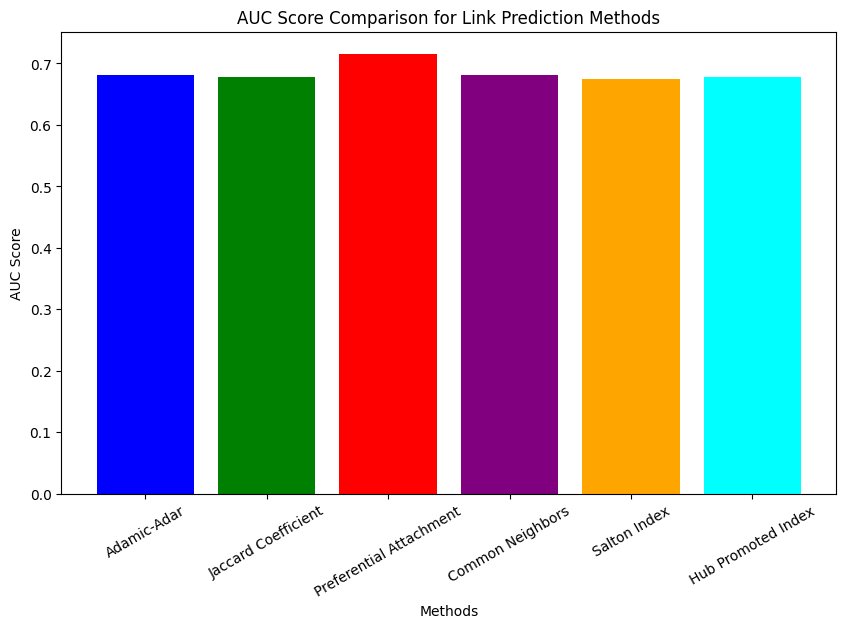

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.metrics import roc_curve, auc

# Compute AUC scores for all methods
auc_scores = {
    "Adamic-Adar": auc(roc_curve(ground_truth, adamic_adar_scores)[0], roc_curve(ground_truth, adamic_adar_scores)[1]),
    "Jaccard Coefficient": auc(roc_curve(ground_truth, jaccard_scores)[0], roc_curve(ground_truth, jaccard_scores)[1]),
    "Preferential Attachment": auc(roc_curve(ground_truth, pref_attach_scores)[0], roc_curve(ground_truth, pref_attach_scores)[1]),
    "Common Neighbors": auc(roc_curve(ground_truth, cn_scores)[0], roc_curve(ground_truth, cn_scores)[1]),
    "Salton Index": auc(roc_curve(ground_truth, salton_scores)[0], roc_curve(ground_truth, salton_scores)[1]),
    "Hub Promoted Index": auc(roc_curve(ground_truth, hpi_scores)[0], roc_curve(ground_truth, hpi_scores)[1])
}

# Extract methods and corresponding AUC scores
methods = list(auc_scores.keys())
scores = list(auc_scores.values())

# Plot bar graph
plt.figure(figsize=(10, 6))
plt.bar(methods, scores, color=["blue", "green", "red", "purple", "orange", "cyan"])
plt.xlabel("Methods")
plt.ylabel("AUC Score")
plt.title("AUC Score Comparison for Link Prediction Methods")
plt.xticks(rotation=30)  # Rotate labels for better readability
plt.show()


"""
### Davis Southern Women Graph  

The **Davis Southern Women Graph** is a classic **bipartite social network dataset** collected by **Allison Davis, Burleigh Gardner, and Mary Gardner** in **1941**. It represents the **attendance of 18 Southern women** at **14 social events** in a town in the southern United States.  

- **Nodes (Vertices):**  
  - One set of nodes represents **18 women**.  
  - The other set represents **14 events**.  
- **Edges (Links):**  
  - An edge exists between a **woman** and an **event** if she attended that event.  

This dataset is widely used in **social network analysis, community detection, and bipartite graph modeling**.  

The **Davis Southern Women dataset**, as provided by **NetworkX**, contains:  

- **Nodes:** 32 (18 women + 14 events)  
- **Edges:** 89 (Connections between women and the events they attended)  

This means the graph consists of **32 nodes** and **89 edges**, where edges indicate the participation of a woman in a specific event.  
"""


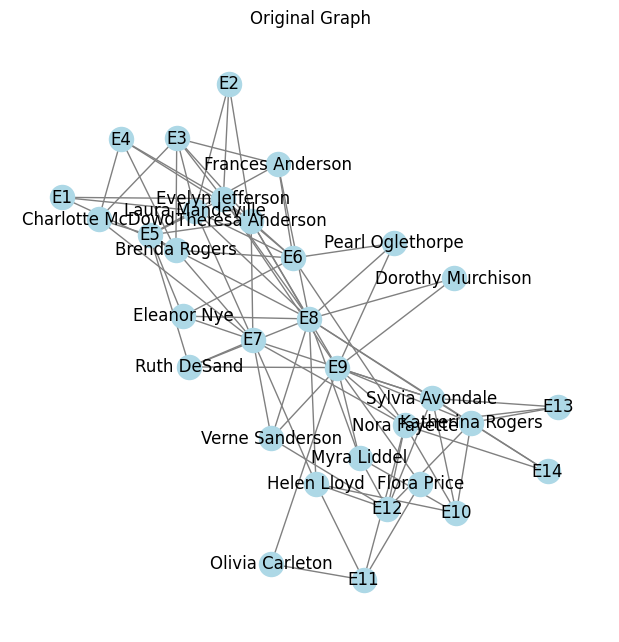

In [ ]:

# Load Les Misérables dataset
graph = nx.davis_southern_women_graph()

# Plot original graph
plt.figure(figsize=(6, 6))
nx.draw(graph, with_labels=True, node_color='lightblue', edge_color='gray')
plt.title("Original Graph")
plt.show()


In [ ]:
# List all nodes in the graph
all_nodes = list(graph.nodes())
print(f"All nodes in the graph: {all_nodes}")

# List all edges in the graph
all_edges = list(graph.edges())
print(f"All edges in the original graph: {all_edges}")


All nodes in the graph: ['Evelyn Jefferson', 'Laura Mandeville', 'Theresa Anderson', 'Brenda Rogers', 'Charlotte McDowd', 'Frances Anderson', 'Eleanor Nye', 'Pearl Oglethorpe', 'Ruth DeSand', 'Verne Sanderson', 'Myra Liddel', 'Katherina Rogers', 'Sylvia Avondale', 'Nora Fayette', 'Helen Lloyd', 'Dorothy Murchison', 'Olivia Carleton', 'Flora Price', 'E1', 'E2', 'E3', 'E4', 'E5', 'E6', 'E7', 'E8', 'E9', 'E10', 'E11', 'E12', 'E13', 'E14']
All edges in the original graph: [('Evelyn Jefferson', 'E1'), ('Evelyn Jefferson', 'E2'), ('Evelyn Jefferson', 'E3'), ('Evelyn Jefferson', 'E4'), ('Evelyn Jefferson', 'E5'), ('Evelyn Jefferson', 'E6'), ('Evelyn Jefferson', 'E8'), ('Evelyn Jefferson', 'E9'), ('Laura Mandeville', 'E1'), ('Laura Mandeville', 'E2'), ('Laura Mandeville', 'E3'), ('Laura Mandeville', 'E5'), ('Laura Mandeville', 'E6'), ('Laura Mandeville', 'E7'), ('Laura Mandeville', 'E8'), ('Theresa Anderson', 'E2'), ('Theresa Anderson', 'E3'), ('Theresa Anderson', 'E4'), ('Theresa Anderson', '

In [ ]:


# Select 20% of edges to remove
edges_to_remove = np.random.choice(len(all_edges), int(0.2 * len(all_edges)), replace=False)
specific_edges_to_remove = [all_edges[i] for i in edges_to_remove]
print(f"Edges selected for removal: {specific_edges_to_remove}")

# Remove specific edges for link prediction
def remove_specific_edges(graph, edges_to_remove):
    graph.remove_edges_from(edges_to_remove)
    return graph, edges_to_remove

graph, removed_edges = remove_specific_edges(graph, specific_edges_to_remove)


Edges selected for removal: [('Dorothy Murchison', 'E8'), ('Brenda Rogers', 'E8'), ('Katherina Rogers', 'E14'), ('Nora Fayette', 'E9'), ('Flora Price', 'E9'), ('Nora Fayette', 'E11'), ('Katherina Rogers', 'E10'), ('Evelyn Jefferson', 'E6'), ('Laura Mandeville', 'E1'), ('Brenda Rogers', 'E1'), ('Evelyn Jefferson', 'E9'), ('Sylvia Avondale', 'E12'), ('Frances Anderson', 'E5'), ('Dorothy Murchison', 'E9'), ('Katherina Rogers', 'E8'), ('Sylvia Avondale', 'E14'), ('Ruth DeSand', 'E9')]


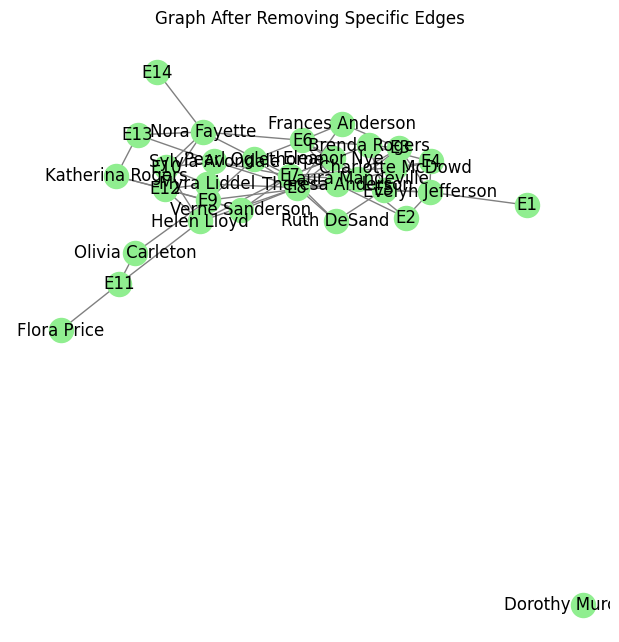

In [ ]:

# Plot graph after removing edges
plt.figure(figsize=(6, 6))
nx.draw(graph, with_labels=True, node_color='lightgreen', edge_color='gray')
plt.title("Graph After Removing Specific Edges")
plt.show()


In [ ]:

# Extract edges and non-edges
edges = list(graph.edges())
non_edges = list(combinations(graph.nodes(), 2))
non_edges = [pair for pair in non_edges if pair not in edges and pair[::-1] not in edges]

# Split into training and testing sets
train_edges, test_edges = train_test_split(edges, test_size=0.3, random_state=42)
train_graph = nx.Graph()
train_graph.add_nodes_from(graph.nodes())  # Preserve all nodes
train_graph.add_edges_from(train_edges)


In [ ]:

# Function to compute link prediction scores
def compute_scores(graph, test_set, metric):
    scores = []
    for u, v in test_set:
        if u not in graph or v not in graph:
            scores.append(0)  # Assign a default score if nodes are missing
            continue

        if metric == "adamic_adar":
            score = sum(1 / np.log(graph.degree(w)) for w in nx.common_neighbors(graph, u, v) if graph.degree(w) > 1)
        elif metric == "jaccard":
            neighbors_u = set(graph.neighbors(u))
            neighbors_v = set(graph.neighbors(v))
            score = len(neighbors_u & neighbors_v) / len(neighbors_u | neighbors_v) if len(neighbors_u | neighbors_v) > 0 else 0
        elif metric == "preferential_attachment":
            score = graph.degree(u) * graph.degree(v)
        elif metric == "common_neighbors":
            score = len(list(nx.common_neighbors(graph, u, v)))
        elif metric == "salton_index":
            neighbors_u = set(graph.neighbors(u))
            neighbors_v = set(graph.neighbors(v))
            denominator = np.sqrt(len(neighbors_u) * len(neighbors_v))
            score = len(neighbors_u & neighbors_v) / denominator if denominator > 0 else 0
        elif metric == "hub_promoted_index":
            neighbors_u = set(graph.neighbors(u))
            neighbors_v = set(graph.neighbors(v))
            min_degree = min(len(neighbors_u), len(neighbors_v))
            score = len(neighbors_u & neighbors_v) / min_degree if min_degree > 0 else 0
        else:
            raise ValueError("Unknown metric")

        scores.append(score)

    return np.array(scores)


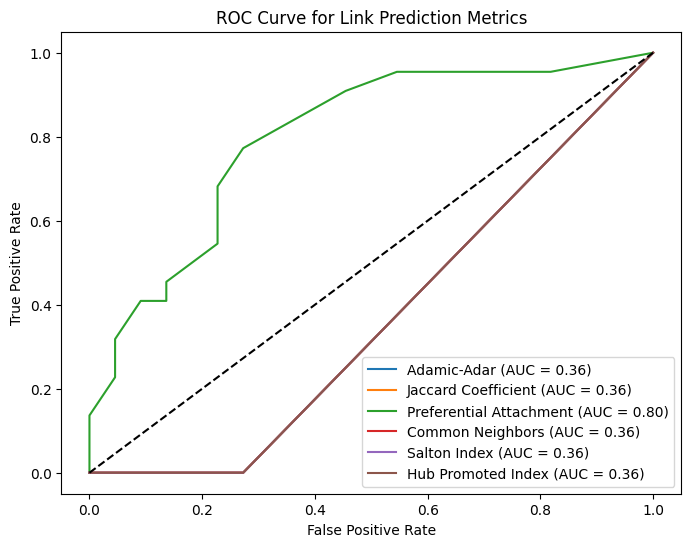

In [ ]:

# Compute scores
adamic_adar_scores = compute_scores(train_graph, test_edges, "adamic_adar")
jaccard_scores = compute_scores(train_graph, test_edges, "jaccard")
pref_attach_scores = compute_scores(train_graph, test_edges, "preferential_attachment")
cn_scores = compute_scores(train_graph, test_edges, "common_neighbors")
salton_scores = compute_scores(train_graph, test_edges, "salton_index")
hpi_scores = compute_scores(train_graph, test_edges, "hub_promoted_index")

# Generate ground truth labels
ground_truth = [1] * len(test_edges) + [0] * len(test_edges)
random_non_edges = np.random.choice(len(non_edges), len(test_edges), replace=False)
test_non_edges = [non_edges[i] for i in random_non_edges]

# Compute scores for non-edges
adamic_adar_scores = np.concatenate([adamic_adar_scores, compute_scores(train_graph, test_non_edges, "adamic_adar")])
jaccard_scores = np.concatenate([jaccard_scores, compute_scores(train_graph, test_non_edges, "jaccard")])
pref_attach_scores = np.concatenate([pref_attach_scores, compute_scores(train_graph, test_non_edges, "preferential_attachment")])
cn_scores = np.concatenate([cn_scores, compute_scores(train_graph, test_non_edges, "common_neighbors")])
salton_scores = np.concatenate([salton_scores, compute_scores(train_graph, test_non_edges, "salton_index")])
hpi_scores = np.concatenate([hpi_scores, compute_scores(train_graph, test_non_edges, "hub_promoted_index")])

# Plot ROC Curves
def plot_roc_curve(y_true, y_scores, method):
    fpr, tpr, _ = roc_curve(y_true, y_scores)
    roc_auc = auc(fpr, tpr)
    plt.plot(fpr, tpr, label=f'{method} (AUC = {roc_auc:.2f})')

plt.figure(figsize=(8, 6))
plot_roc_curve(ground_truth, adamic_adar_scores, "Adamic-Adar")
plot_roc_curve(ground_truth, jaccard_scores, "Jaccard Coefficient")
plot_roc_curve(ground_truth, pref_attach_scores, "Preferential Attachment")
plot_roc_curve(ground_truth, cn_scores, "Common Neighbors")
plot_roc_curve(ground_truth, salton_scores, "Salton Index")
plot_roc_curve(ground_truth, hpi_scores, "Hub Promoted Index")

plt.plot([0, 1], [0, 1], 'k--')
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.title("ROC Curve for Link Prediction Metrics")
plt.legend()
plt.show()


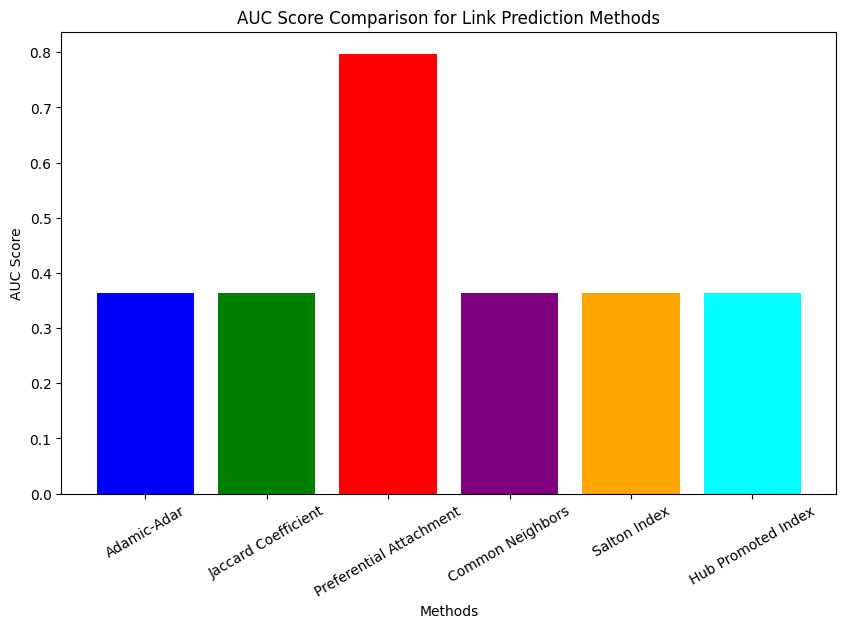

In [ ]:

import numpy as np
import matplotlib.pyplot as plt
from sklearn.metrics import roc_curve, auc

# Compute AUC scores for all methods
auc_scores = {
    "Adamic-Adar": auc(roc_curve(ground_truth, adamic_adar_scores)[0], roc_curve(ground_truth, adamic_adar_scores)[1]),
    "Jaccard Coefficient": auc(roc_curve(ground_truth, jaccard_scores)[0], roc_curve(ground_truth, jaccard_scores)[1]),
    "Preferential Attachment": auc(roc_curve(ground_truth, pref_attach_scores)[0], roc_curve(ground_truth, pref_attach_scores)[1]),
    "Common Neighbors": auc(roc_curve(ground_truth, cn_scores)[0], roc_curve(ground_truth, cn_scores)[1]),
    "Salton Index": auc(roc_curve(ground_truth, salton_scores)[0], roc_curve(ground_truth, salton_scores)[1]),
    "Hub Promoted Index": auc(roc_curve(ground_truth, hpi_scores)[0], roc_curve(ground_truth, hpi_scores)[1])
}

# Extract methods and corresponding AUC scores
methods = list(auc_scores.keys())
scores = list(auc_scores.values())

# Plot bar graph
plt.figure(figsize=(10, 6))
plt.bar(methods, scores, color=["blue", "green", "red", "purple", "orange", "cyan"])
plt.xlabel("Methods")
plt.ylabel("AUC Score")
plt.title("AUC Score Comparison for Link Prediction Methods")
plt.xticks(rotation=30)  # Rotate labels for better readability
plt.show()


## Barabási–Albert (BA) Graph Model

The **Barabási–Albert (BA) model** is a type of **scale-free network** that grows using the principle of **preferential attachment**. This means that new nodes are more likely to connect to existing nodes with high degrees (i.e., popular nodes attract more connections).

### **Key Characteristics**
- **Scale-Free Property:** The degree distribution follows a power law, meaning a few nodes have very high degrees, while most nodes have fewer connections.
- **Preferential Attachment:** Nodes with higher degrees are more likely to get new connections.
- **Emergent Hubs:** Over time, the network naturally forms highly connected hubs.

### **Graph Generation Process**
1. Start with a small number of fully connected nodes.
2. Add new nodes one by one.
3. Each new node connects to `m` existing nodes with a probability proportional to their degree.

### **Applications**
- **Social Networks:** People with many connections (e.g., influencers) gain more followers.
- **Internet Structure:** Some websites (like Google) have significantly more links than others.
- **Biological Networks:** Some genes interact with many other genes in biological systems.

### **Example in NetworkX**
Created is a Barabási–Albert graph with 100 nodes and each new node connecting to 3 existing nodes



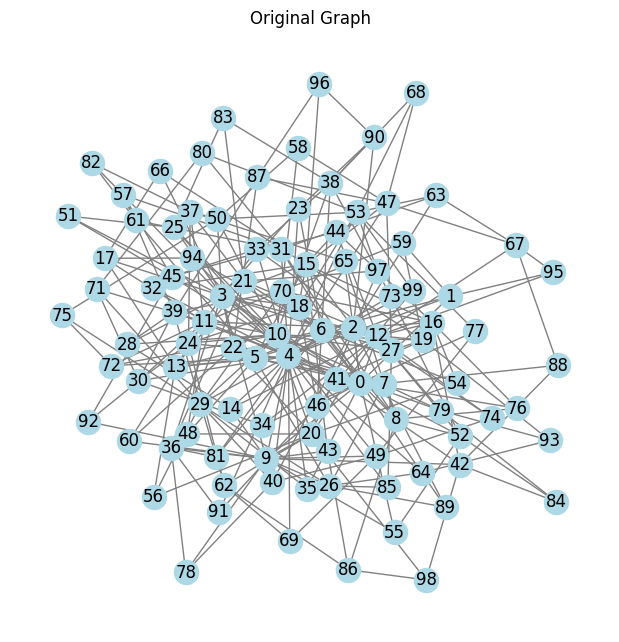

In [ ]:
# Generate Barabási-Albert graph
G = nx.barabasi_albert_graph(100, 3)  # 100 nodes, each new node connects to 3 existing nodes

# Plot original graph
plt.figure(figsize=(6, 6))
nx.draw(G, with_labels=True, node_color='lightblue', edge_color='gray')
plt.title("Original Graph")
plt.show()

In [ ]:
# List all nodes in the graph
all_nodes = list(G.nodes())
print(f"All nodes in the graph: {all_nodes}")

# List all edges in the graph
all_edges = list(G.edges())
print(f"All edges in the original graph: {all_edges}")


All nodes in the graph: [0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33, 34, 35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49, 50, 51, 52, 53, 54, 55, 56, 57, 58, 59, 60, 61, 62, 63, 64, 65, 66, 67, 68, 69, 70, 71, 72, 73, 74, 75, 76, 77, 78, 79, 80, 81, 82, 83, 84, 85, 86, 87, 88, 89, 90, 91, 92, 93, 94, 95, 96, 97, 98, 99]
All edges in the original graph: [(0, 1), (0, 2), (0, 3), (0, 5), (0, 6), (0, 7), (0, 8), (0, 9), (0, 10), (0, 12), (0, 18), (0, 31), (0, 34), (0, 35), (0, 41), (0, 46), (0, 52), (0, 55), (0, 64), (0, 65), (0, 76), (0, 77), (1, 4), (1, 6), (1, 59), (1, 95), (2, 4), (2, 5), (2, 11), (2, 15), (2, 16), (2, 40), (2, 63), (2, 89), (2, 90), (3, 4), (3, 9), (3, 10), (3, 12), (3, 15), (3, 17), (3, 18), (3, 22), (3, 23), (3, 25), (3, 27), (3, 28), (3, 36), (3, 50), (3, 51), (3, 66), (3, 82), (4, 5), (4, 7), (4, 9), (4, 10), (4, 11), (4, 13), (4, 14), (4, 23), (4, 25), (4, 29), (4, 30), (

Edges selected for removal: [(0, 1), (0, 2), (0, 3), (0, 5), (0, 7), (0, 9), (0, 10), (0, 11), (3, 6), (3, 8), (3, 11), (3, 14), (3, 18), (3, 33), (4, 72), (4, 76), (5, 13), (5, 53), (5, 54), (6, 37), (6, 40), (6, 50), (6, 51), (6, 52), (6, 55), (6, 56), (6, 60), (6, 63), (6, 67), (7, 1), (7, 2), (7, 5), (7, 34), (7, 41), (10, 38), (10, 49), (10, 57), (10, 73), (10, 88), (10, 89), (11, 15), (11, 16), (11, 19), (20, 91), (21, 37), (21, 51), (21, 68), (21, 70), (21, 88), (21, 93), (21, 95), (22, 25), (22, 28), (22, 32), (23, 43), (23, 66), (24, 29), (24, 89), (24, 99), (25, 45), (26, 32), (27, 73), (27, 83), (28, 35), (28, 43), (28, 59), (28, 62), (28, 96), (29, 46), (29, 55), (29, 63), (29, 65), (29, 94), (30, 36), (30, 58)]
Number of edges in original graph: 291
Number of edges after removal: 278


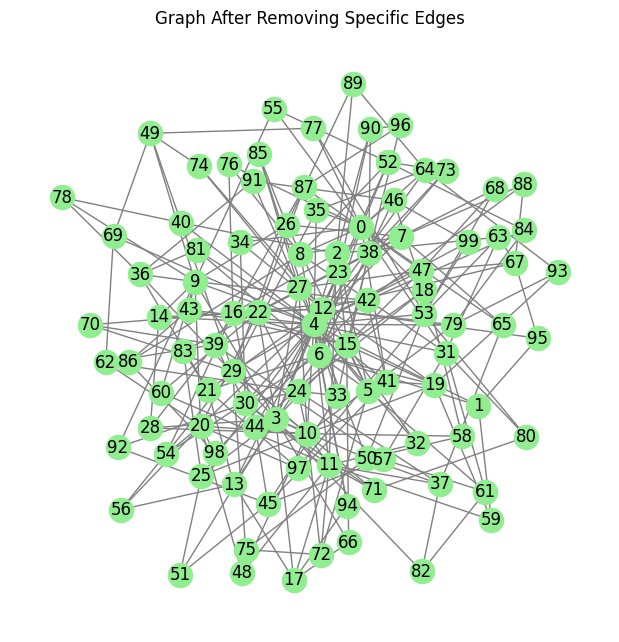

In [ ]:
# Select edges to remove
specific_edges_to_remove = [(0, 1), (0, 2), (0, 3), (0, 5), (0, 7), (0, 9), (0, 10), (0, 11),(3, 6), (3, 8), (3, 11), (3, 14), (3, 18), (3, 33),  (4, 72), (4, 76), (5, 13), (5, 53), (5, 54), (6, 37), (6, 40), (6, 50), (6, 51), (6, 52), (6, 55), (6, 56), (6, 60), (6, 63), (6, 67), (7,1),(7,2), (7,5),(7,34),(7,41),(10, 38), (10, 49), (10, 57), (10, 73), (10, 88), (10, 89), (11, 15), (11, 16), (11, 19), (20, 91), (21, 37), (21, 51), (21, 68), (21, 70), (21, 88), (21, 93), (21, 95), (22, 25), (22, 28), (22, 32), (23, 43), (23, 66), (24, 29), (24, 89), (24, 99), (25, 45), (26, 32), (27, 73), (27, 83), (28, 35), (28, 43), (28, 59), (28, 62), (28, 96), (29, 46), (29, 55), (29, 63), (29, 65), (29, 94), (30, 36), (30, 58)]
print(f"Edges selected for removal: {specific_edges_to_remove}")

# Print number of edges in original graph
print(f"Number of edges in original graph: {G.number_of_edges()}")

# Remove specific edges for link prediction
def remove_specific_edges(graph, edges_to_remove):
    graph.remove_edges_from(edges_to_remove)
    return graph, edges_to_remove

G, removed_edges = remove_specific_edges(G, specific_edges_to_remove)

# Print number of edges in modified graph
print(f"Number of edges after removal: {G.number_of_edges()}")

# Plot graph after removing edges
plt.figure(figsize=(6, 6))
nx.draw(G, with_labels=True, node_color='lightgreen', edge_color='gray')
plt.title("Graph After Removing Specific Edges")
plt.show()

In [ ]:

# Extract edges and non-edges
edges = list(G.edges())
non_edges = list(combinations(G.nodes(), 2))
non_edges = [pair for pair in non_edges if pair not in edges and pair[::-1] not in edges]

# Split into training and testing sets
train_edges, test_edges = train_test_split(edges, test_size=0.3, random_state=42)
train_graph = nx.Graph()
train_graph.add_nodes_from(G.nodes())  # Preserve all nodes
train_graph.add_edges_from(train_edges)

# Function to compute link prediction scores

def compute_scores(graph, test_set, metric):
    scores = []
    for u, v in test_set:
        if u not in graph or v not in graph:
            scores.append(0)  # Assign a default score if nodes are missing
            continue

        if metric == "adamic_adar":
            score = sum(1 / np.log(graph.degree(w)) for w in nx.common_neighbors(graph, u, v) if graph.degree(w) > 1)
        elif metric == "jaccard":
            neighbors_u = set(graph.neighbors(u))
            neighbors_v = set(graph.neighbors(v))
            score = len(neighbors_u & neighbors_v) / len(neighbors_u | neighbors_v) if len(neighbors_u | neighbors_v) > 0 else 0
        elif metric == "preferential_attachment":
            score = graph.degree(u) * graph.degree(v)
        elif metric == "common_neighbors":
            score = len(list(nx.common_neighbors(graph, u, v)))
        elif metric == "salton_index":
            neighbors_u = set(graph.neighbors(u))
            neighbors_v = set(graph.neighbors(v))
            denominator = np.sqrt(len(neighbors_u) * len(neighbors_v))
            score = len(neighbors_u & neighbors_v) / denominator if denominator > 0 else 0
        elif metric == "hub_promoted_index":
            neighbors_u = set(graph.neighbors(u))
            neighbors_v = set(graph.neighbors(v))
            min_degree = min(len(neighbors_u), len(neighbors_v))
            score = len(neighbors_u & neighbors_v) / min_degree if min_degree > 0 else 0
        else:
            raise ValueError("Unknown metric")

        scores.append(score)

    return np.array(scores)


# Compute scores
adamic_adar_scores = compute_scores(train_graph, test_edges, "adamic_adar")
jaccard_scores = compute_scores(train_graph, test_edges, "jaccard")
pref_attach_scores = compute_scores(train_graph, test_edges, "preferential_attachment")
cn_scores = compute_scores(train_graph, test_edges, "common_neighbors")
salton_scores = compute_scores(train_graph, test_edges, "salton_index")
hpi_scores = compute_scores(train_graph, test_edges, "hub_promoted_index")

# Generate ground truth labels
ground_truth = [1] * len(test_edges) + [0] * len(test_edges)
random_non_edges = np.random.choice(len(non_edges), len(test_edges), replace=False)
test_non_edges = [non_edges[i] for i in random_non_edges]

# Compute scores for non-edges
adamic_adar_scores = np.concatenate([adamic_adar_scores, compute_scores(train_graph, test_non_edges, "adamic_adar")])
jaccard_scores = np.concatenate([jaccard_scores, compute_scores(train_graph, test_non_edges, "jaccard")])
pref_attach_scores = np.concatenate([pref_attach_scores, compute_scores(train_graph, test_non_edges, "preferential_attachment")])
cn_scores = np.concatenate([cn_scores, compute_scores(train_graph, test_non_edges, "common_neighbors")])
salton_scores = np.concatenate([salton_scores, compute_scores(train_graph, test_non_edges, "salton_index")])
hpi_scores = np.concatenate([hpi_scores, compute_scores(train_graph, test_non_edges, "hub_promoted_index")])


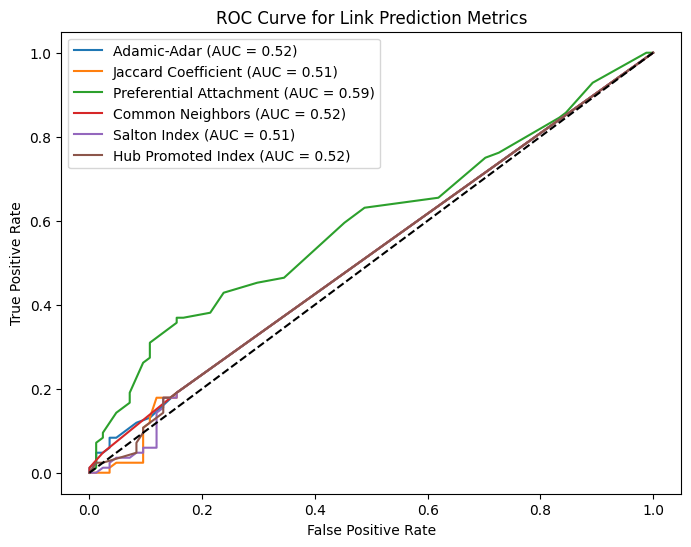

In [ ]:

# Plot ROC Curves
def plot_roc_curve(y_true, y_scores, method):
    fpr, tpr, _ = roc_curve(y_true, y_scores)
    roc_auc = auc(fpr, tpr)
    plt.plot(fpr, tpr, label=f'{method} (AUC = {roc_auc:.2f})')

plt.figure(figsize=(8, 6))
plot_roc_curve(ground_truth, adamic_adar_scores, "Adamic-Adar")
plot_roc_curve(ground_truth, jaccard_scores, "Jaccard Coefficient")
plot_roc_curve(ground_truth, pref_attach_scores, "Preferential Attachment")
plot_roc_curve(ground_truth, cn_scores, "Common Neighbors")
plot_roc_curve(ground_truth, salton_scores, "Salton Index")
plot_roc_curve(ground_truth, hpi_scores, "Hub Promoted Index")

plt.plot([0, 1], [0, 1], 'k--')
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.title("ROC Curve for Link Prediction Metrics")
plt.legend()
plt.show()


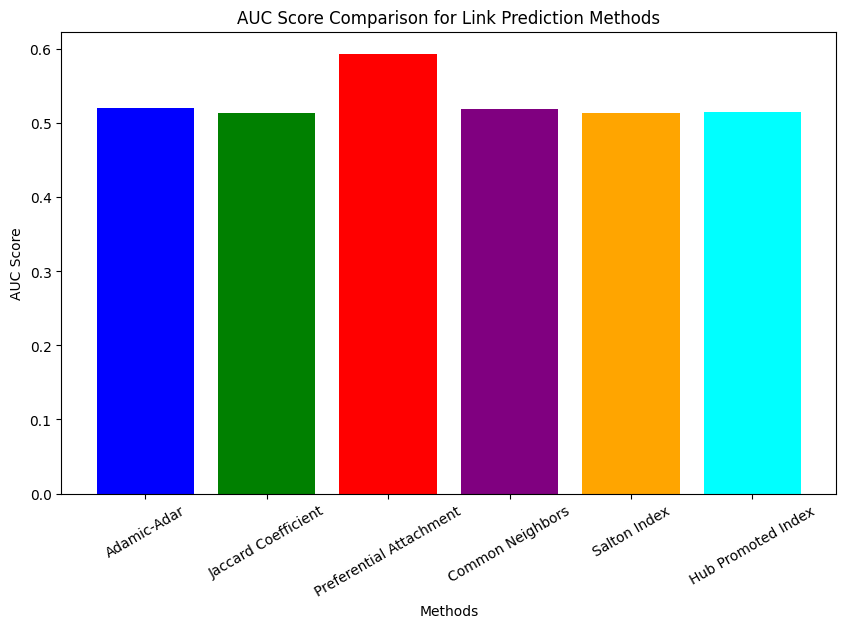

In [ ]:

import numpy as np
import matplotlib.pyplot as plt
from sklearn.metrics import roc_curve, auc

# Compute AUC scores for all methods
auc_scores = {
    "Adamic-Adar": auc(roc_curve(ground_truth, adamic_adar_scores)[0], roc_curve(ground_truth, adamic_adar_scores)[1]),
    "Jaccard Coefficient": auc(roc_curve(ground_truth, jaccard_scores)[0], roc_curve(ground_truth, jaccard_scores)[1]),
    "Preferential Attachment": auc(roc_curve(ground_truth, pref_attach_scores)[0], roc_curve(ground_truth, pref_attach_scores)[1]),
    "Common Neighbors": auc(roc_curve(ground_truth, cn_scores)[0], roc_curve(ground_truth, cn_scores)[1]),
    "Salton Index": auc(roc_curve(ground_truth, salton_scores)[0], roc_curve(ground_truth, salton_scores)[1]),
    "Hub Promoted Index": auc(roc_curve(ground_truth, hpi_scores)[0], roc_curve(ground_truth, hpi_scores)[1])
}

# Extract methods and corresponding AUC scores
methods = list(auc_scores.keys())
scores = list(auc_scores.values())

# Plot bar graph
plt.figure(figsize=(10, 6))
plt.bar(methods, scores, color=["blue", "green", "red", "purple", "orange", "cyan"])
plt.xlabel("Methods")
plt.ylabel("AUC Score")
plt.title("AUC Score Comparison for Link Prediction Methods")
plt.xticks(rotation=30)  # Rotate labels for better readability
plt.show()


## Erdős-Rényi Graph (Random Graph Model)

The **Erdős-Rényi Graph (ER Graph)** is a fundamental model in random graph theory, introduced by **Paul Erdős and Alfréd Rényi**. It is used to study the properties of **randomly generated networks**.

### **Key Characteristics**
- **Nodes (N):** Fixed number of nodes in the graph.
- **Edges:** Edges are added randomly with a certain probability.
- **Network Type:** Probabilistic model used for studying **random network structures**.

### **Types of Erdős-Rényi Graphs**
1. **G(n, M) Model:** A graph is chosen **uniformly at random** from all graphs with **n nodes and exactly M edges**.
2. **G(n, p) Model:** Each **possible edge** between **n nodes** is included with an **independent probability p**.

### **Applications**
- **Network Science:** Understanding random networks, modeling social networks, biological networks, etc.
- **Percolation Theory:** Studying the **threshold behavior** of connectivity in networks.
- **Graph Theory:** Testing probabilistic methods in graph algorithms.
- **Cybersecurity:** Analyzing random attack resilience in network structures.



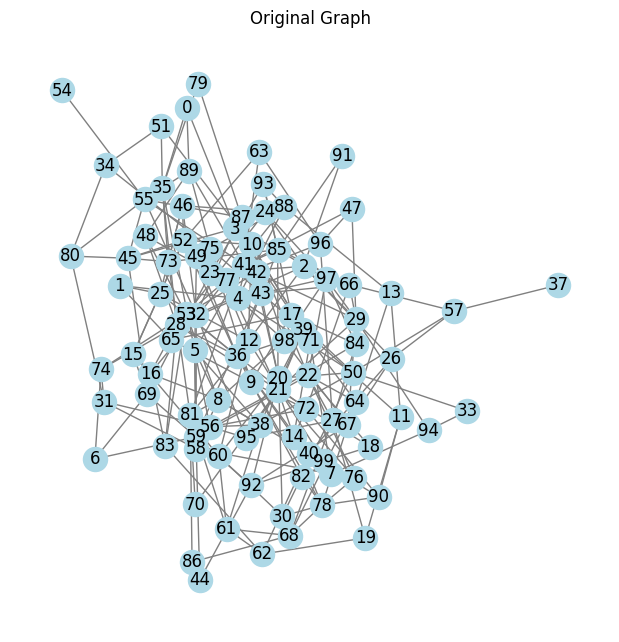

In [ ]:
# Generate Erdős-Rényi graph
G = nx.erdos_renyi_graph(100, 0.05)  # 100 nodes, probability of edge creation 0.05


# Plot original graph
plt.figure(figsize=(6, 6))
nx.draw(G, with_labels=True, node_color='lightblue', edge_color='gray')
plt.title("Original Graph")
plt.show()


In [ ]:

# List all nodes in the graph
all_nodes = list(G.nodes())
print(f"All nodes in the graph: {all_nodes}")

# List all edges in the graph
all_edges = list(G.edges())
print(f"All edges in the original graph: {all_edges}")

# Print number of edges in original graph
print(f"Number of edges in original graph: {G.number_of_edges()}")

All nodes in the graph: [0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33, 34, 35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49, 50, 51, 52, 53, 54, 55, 56, 57, 58, 59, 60, 61, 62, 63, 64, 65, 66, 67, 68, 69, 70, 71, 72, 73, 74, 75, 76, 77, 78, 79, 80, 81, 82, 83, 84, 85, 86, 87, 88, 89, 90, 91, 92, 93, 94, 95, 96, 97, 98, 99]
All edges in the original graph: [(0, 9), (0, 23), (0, 32), (0, 36), (0, 90), (1, 24), (1, 71), (1, 77), (1, 79), (2, 11), (2, 24), (2, 31), (2, 37), (2, 49), (2, 55), (3, 37), (3, 44), (3, 58), (3, 62), (3, 64), (3, 70), (3, 77), (3, 94), (3, 95), (3, 99), (4, 12), (4, 25), (4, 38), (4, 44), (4, 84), (5, 10), (5, 28), (5, 49), (5, 60), (5, 73), (5, 75), (6, 9), (6, 11), (6, 12), (6, 26), (6, 41), (6, 55), (6, 61), (7, 19), (7, 47), (7, 55), (7, 73), (8, 20), (8, 34), (8, 75), (8, 81), (8, 93), (8, 95), (8, 97), (9, 59), (9, 68), (9, 97), (10, 69), (10, 84), (11, 18), (11, 31), 

In [ ]:
# Select edges to remove
specific_edges_to_remove = [(0, 27), (0, 45), (0, 48), (0, 63), (1, 8), (1, 47), (1, 60), (1, 75), (1, 78), (2, 30), (2, 64), (3, 10), (3, 32), (3, 53), (3, 82), (3, 84), (3, 92), (4, 23), (4, 34), (4, 63), (4, 72), (5, 29), (5, 64), (5, 91), (5, 92), (6, 83), (6, 85), (7, 65), (7, 68), (8, 68), (8, 92), (9, 14), (9, 59), (9, 70), (10, 28), (10, 41), (10, 57), (11, 23), (11, 27), (11, 65), (11, 74), (11, 88), (11, 92), (12, 25), (12, 62), (12, 72), (12, 82), (13, 45), (13, 87), (13, 92), (14, 34), (14, 87), (15, 22), (15, 25), (15, 39), (15, 42), (15, 43), (15, 59), (15, 73), (16, 43), (16, 46), (16, 57), (16, 65), (17, 42), (26, 94), (27, 36), (27, 39), (27, 63), (27, 77), (27, 92), (27, 94), (28, 29), (28, 61), (29, 45), (30, 57), (30, 66), (31, 53), (31, 62), (31, 79), (32, 43), (32, 82), (33, 57), (34, 45)]
print(f"Edges selected for removal: {specific_edges_to_remove}")


Edges selected for removal: [(0, 27), (0, 45), (0, 48), (0, 63), (1, 8), (1, 47), (1, 60), (1, 75), (1, 78), (2, 30), (2, 64), (3, 10), (3, 32), (3, 53), (3, 82), (3, 84), (3, 92), (4, 23), (4, 34), (4, 63), (4, 72), (5, 29), (5, 64), (5, 91), (5, 92), (6, 83), (6, 85), (7, 65), (7, 68), (8, 68), (8, 92), (9, 14), (9, 59), (9, 70), (10, 28), (10, 41), (10, 57), (11, 23), (11, 27), (11, 65), (11, 74), (11, 88), (11, 92), (12, 25), (12, 62), (12, 72), (12, 82), (13, 45), (13, 87), (13, 92), (14, 34), (14, 87), (15, 22), (15, 25), (15, 39), (15, 42), (15, 43), (15, 59), (15, 73), (16, 43), (16, 46), (16, 57), (16, 65), (17, 42), (26, 94), (27, 36), (27, 39), (27, 63), (27, 77), (27, 92), (27, 94), (28, 29), (28, 61), (29, 45), (30, 57), (30, 66), (31, 53), (31, 62), (31, 79), (32, 43), (32, 82), (33, 57), (34, 45)]


In [ ]:
# Remove specific edges for link prediction
def remove_specific_edges(graph, edges_to_remove):
    graph.remove_edges_from(edges_to_remove)
    return graph, edges_to_remove

G, removed_edges = remove_specific_edges(G, specific_edges_to_remove)

# Print number of edges in modified graph
print(f"Number of edges after removal: {G.number_of_edges()}")

Number of edges after removal: 233


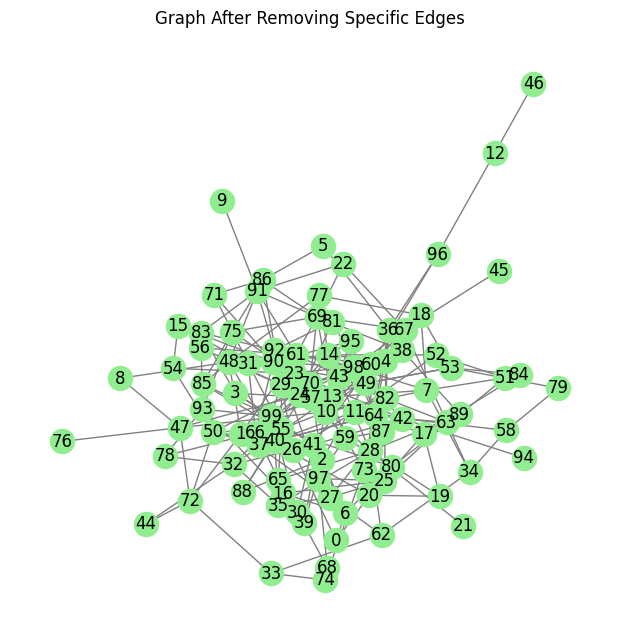

In [ ]:
# Plot graph after removing edges
plt.figure(figsize=(6, 6))
nx.draw(G, with_labels=True, node_color='lightgreen', edge_color='gray')
plt.title("Graph After Removing Specific Edges")
plt.show()

In [ ]:
# Extract edges and non-edges
edges = list(G.edges())
non_edges = list(combinations(G.nodes(), 2))
non_edges = [pair for pair in non_edges if pair not in edges and pair[::-1] not in edges]

# Split into training and testing sets
train_edges, test_edges = train_test_split(edges, test_size=0.3, random_state=42)
train_graph = nx.Graph()
train_graph.add_nodes_from(G.nodes())  # Preserve all nodes
train_graph.add_edges_from(train_edges)

# Function to compute link prediction scores
def compute_scores(graph, test_set, metric):
    scores = []
    for u, v in test_set:
        if u not in graph or v not in graph:
            scores.append(0)  # Assign a default score if nodes are missing
            continue

        if metric == "adamic_adar":
            score = sum(1 / np.log(graph.degree(w)) for w in nx.common_neighbors(graph, u, v) if graph.degree(w) > 1)
        elif metric == "jaccard":
            neighbors_u = set(graph.neighbors(u))
            neighbors_v = set(graph.neighbors(v))
            score = len(neighbors_u & neighbors_v) / len(neighbors_u | neighbors_v) if len(neighbors_u | neighbors_v) > 0 else 0
        elif metric == "preferential_attachment":
            score = graph.degree(u) * graph.degree(v)
        elif metric == "common_neighbors":
            score = len(list(nx.common_neighbors(graph, u, v)))
        elif metric == "salton_index":
            neighbors_u = set(graph.neighbors(u))
            neighbors_v = set(graph.neighbors(v))
            denominator = np.sqrt(len(neighbors_u) * len(neighbors_v))
            score = len(neighbors_u & neighbors_v) / denominator if denominator > 0 else 0
        elif metric == "hub_promoted_index":
            neighbors_u = set(graph.neighbors(u))
            neighbors_v = set(graph.neighbors(v))
            min_degree = min(len(neighbors_u), len(neighbors_v))
            score = len(neighbors_u & neighbors_v) / min_degree if min_degree > 0 else 0
        else:
            raise ValueError("Unknown metric")

        scores.append(score)

    return np.array(scores)


# Compute scores
adamic_adar_scores = compute_scores(train_graph, test_edges, "adamic_adar")
jaccard_scores = compute_scores(train_graph, test_edges, "jaccard")
pref_attach_scores = compute_scores(train_graph, test_edges, "preferential_attachment")
cn_scores = compute_scores(train_graph, test_edges, "common_neighbors")
salton_scores = compute_scores(train_graph, test_edges, "salton_index")
hpi_scores = compute_scores(train_graph, test_edges, "hub_promoted_index")

# Generate ground truth labels
ground_truth = [1] * len(test_edges) + [0] * len(test_edges)
random_non_edges = np.random.choice(len(non_edges), len(test_edges), replace=False)
test_non_edges = [non_edges[i] for i in random_non_edges]

# Compute scores for non-edges
adamic_adar_scores = np.concatenate([adamic_adar_scores, compute_scores(train_graph, test_non_edges, "adamic_adar")])
jaccard_scores = np.concatenate([jaccard_scores, compute_scores(train_graph, test_non_edges, "jaccard")])
pref_attach_scores = np.concatenate([pref_attach_scores, compute_scores(train_graph, test_non_edges, "preferential_attachment")])
cn_scores = np.concatenate([cn_scores, compute_scores(train_graph, test_non_edges, "common_neighbors")])
salton_scores = np.concatenate([salton_scores, compute_scores(train_graph, test_non_edges, "salton_index")])
hpi_scores = np.concatenate([hpi_scores, compute_scores(train_graph, test_non_edges, "hub_promoted_index")])


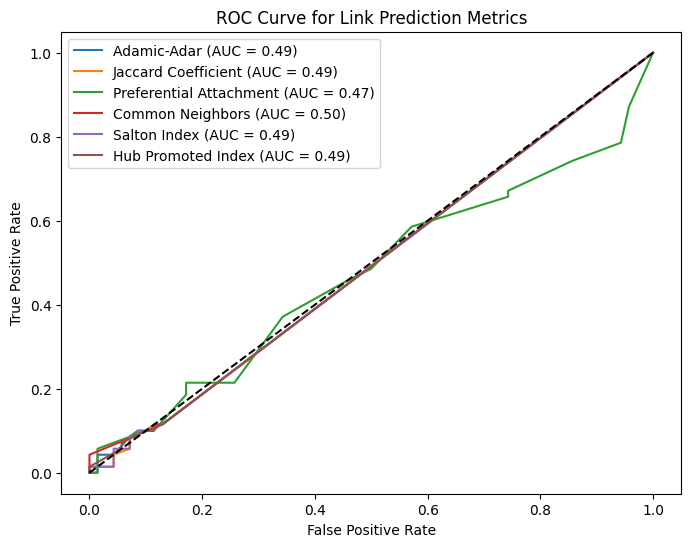

In [ ]:

# Plot ROC Curves
def plot_roc_curve(y_true, y_scores, method):
    fpr, tpr, _ = roc_curve(y_true, y_scores)
    roc_auc = auc(fpr, tpr)
    plt.plot(fpr, tpr, label=f'{method} (AUC = {roc_auc:.2f})')

plt.figure(figsize=(8, 6))
plot_roc_curve(ground_truth, adamic_adar_scores, "Adamic-Adar")
plot_roc_curve(ground_truth, jaccard_scores, "Jaccard Coefficient")
plot_roc_curve(ground_truth, pref_attach_scores, "Preferential Attachment")
plot_roc_curve(ground_truth, cn_scores, "Common Neighbors")
plot_roc_curve(ground_truth, salton_scores, "Salton Index")
plot_roc_curve(ground_truth, hpi_scores, "Hub Promoted Index")

plt.plot([0, 1], [0, 1], 'k--')
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.title("ROC Curve for Link Prediction Metrics")
plt.legend()
plt.show()


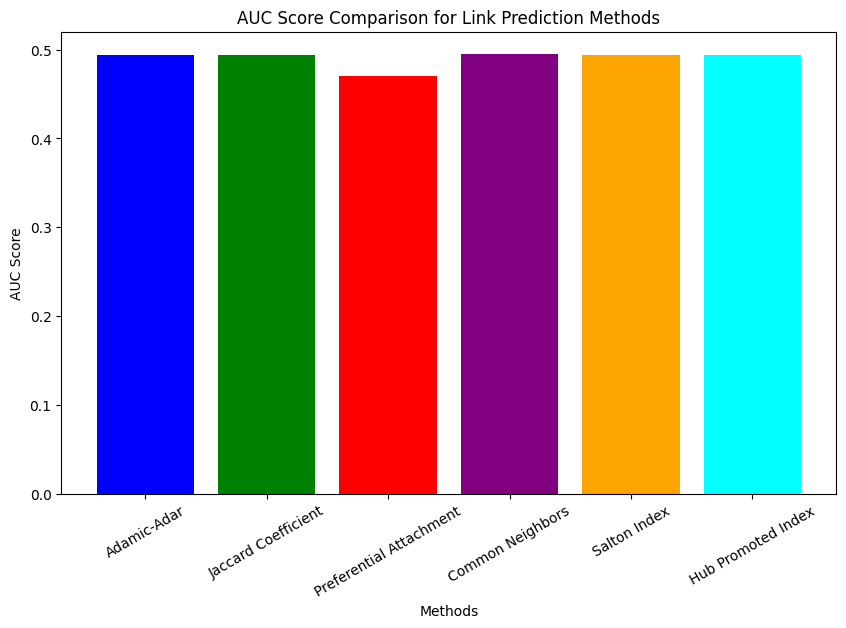

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.metrics import roc_curve, auc

# Compute AUC scores for all methods
auc_scores = {
    "Adamic-Adar": auc(roc_curve(ground_truth, adamic_adar_scores)[0], roc_curve(ground_truth, adamic_adar_scores)[1]),
    "Jaccard Coefficient": auc(roc_curve(ground_truth, jaccard_scores)[0], roc_curve(ground_truth, jaccard_scores)[1]),
    "Preferential Attachment": auc(roc_curve(ground_truth, pref_attach_scores)[0], roc_curve(ground_truth, pref_attach_scores)[1]),
    "Common Neighbors": auc(roc_curve(ground_truth, cn_scores)[0], roc_curve(ground_truth, cn_scores)[1]),
    "Salton Index": auc(roc_curve(ground_truth, salton_scores)[0], roc_curve(ground_truth, salton_scores)[1]),
    "Hub Promoted Index": auc(roc_curve(ground_truth, hpi_scores)[0], roc_curve(ground_truth, hpi_scores)[1])
}

# Extract methods and corresponding AUC scores
methods = list(auc_scores.keys())
scores = list(auc_scores.values())

# Plot bar graph
plt.figure(figsize=(10, 6))
plt.bar(methods, scores, color=["blue", "green", "red", "purple", "orange", "cyan"])
plt.xlabel("Methods")
plt.ylabel("AUC Score")
plt.title("AUC Score Comparison for Link Prediction Methods")
plt.xticks(rotation=30)  # Rotate labels for better readability
plt.show()


## Florentine Family Graph

The **Florentine Family Graph** represents marriage and business ties among influential families in Florence during the **Renaissance period** (15th century). This dataset is commonly used in social network analysis to study power dynamics and influence.

### **Key Characteristics**
- **Nodes:** Represent **families** in Renaissance Florence.
- **Edges:** Represent relationships, such as **marriage alliances** or **business ties**.
- **Network Type:** Small, real-world network used for studying **centrality, power, and influence**.

### **Notable Families**
- **Medici:** The most powerful and influential family, acting as a central hub.
- **Strozzi & Pazzi:** Rivals of the Medici family.
- **Other families:** Albizzi, Ridolfi, Salviati, etc.

### **Applications**
- **Historical Social Network Analysis:** Understanding power structures and alliances.
- **Centrality Measures:** Identifying the most influential families using degree centrality, betweenness centrality, etc.
- **Political Influence:** Studying how networks of marriage and business shaped political power.

### **Example in NetworkX**
To load and visualize the **Florentine Family Graph** in Python using NetworkX




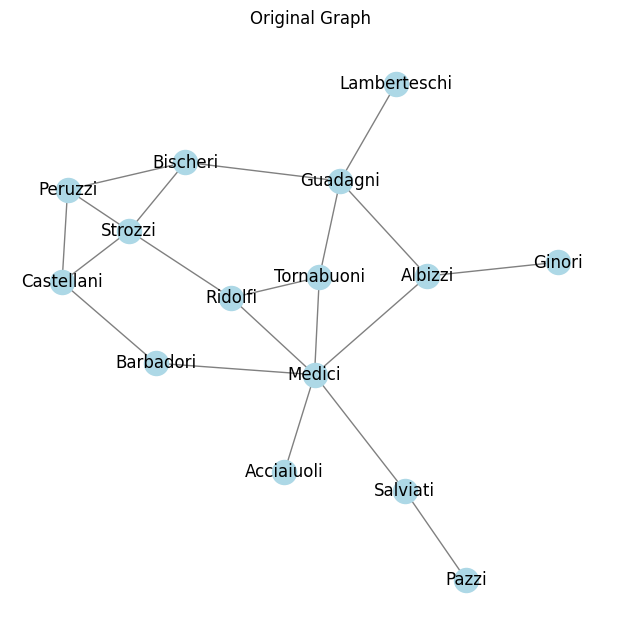

In [ ]:
# Generate collaboration graph (Florentine Families Graph)
G = nx.florentine_families_graph()
# Plot original graph
plt.figure(figsize=(6, 6))
nx.draw(G, with_labels=True, node_color='lightblue', edge_color='gray')
plt.title("Original Graph")
plt.show()

In [ ]:

# List all nodes in the graph
all_nodes = list(G.nodes())
print(f"All nodes in the graph: {all_nodes}")

# List all edges in the graph
all_edges = list(G.edges())
print(f"All edges in the original graph: {all_edges}")


# Print number of edges in original graph
print(f"Number of edges in original graph: {G.number_of_edges()}")


All nodes in the graph: ['Acciaiuoli', 'Medici', 'Castellani', 'Peruzzi', 'Strozzi', 'Barbadori', 'Ridolfi', 'Tornabuoni', 'Albizzi', 'Salviati', 'Pazzi', 'Bischeri', 'Guadagni', 'Ginori', 'Lamberteschi']
All edges in the original graph: [('Acciaiuoli', 'Medici'), ('Medici', 'Barbadori'), ('Medici', 'Ridolfi'), ('Medici', 'Tornabuoni'), ('Medici', 'Albizzi'), ('Medici', 'Salviati'), ('Castellani', 'Peruzzi'), ('Castellani', 'Strozzi'), ('Castellani', 'Barbadori'), ('Peruzzi', 'Strozzi'), ('Peruzzi', 'Bischeri'), ('Strozzi', 'Ridolfi'), ('Strozzi', 'Bischeri'), ('Ridolfi', 'Tornabuoni'), ('Tornabuoni', 'Guadagni'), ('Albizzi', 'Ginori'), ('Albizzi', 'Guadagni'), ('Salviati', 'Pazzi'), ('Bischeri', 'Guadagni'), ('Guadagni', 'Lamberteschi')]
Number of edges in original graph: 20


In [ ]:

# Select edges to remove
specific_edges_to_remove =  [('Castellani', 'Peruzzi'), ('Castellani', 'Strozzi'), ('Castellani', 'Barbadori'), ('Peruzzi', 'Strozzi')]

print(f"Edges selected for removal: {specific_edges_to_remove}")

# Remove specific edges for link prediction
def remove_specific_edges(graph, edges_to_remove):
    graph.remove_edges_from(edges_to_remove)
    return graph, edges_to_remove

G, removed_edges = remove_specific_edges(G, specific_edges_to_remove)

# Print number of edges in modified graph
print(f"Number of edges after removal: {G.number_of_edges()}")


Edges selected for removal: [('Castellani', 'Peruzzi'), ('Castellani', 'Strozzi'), ('Castellani', 'Barbadori'), ('Peruzzi', 'Strozzi')]
Number of edges after removal: 16


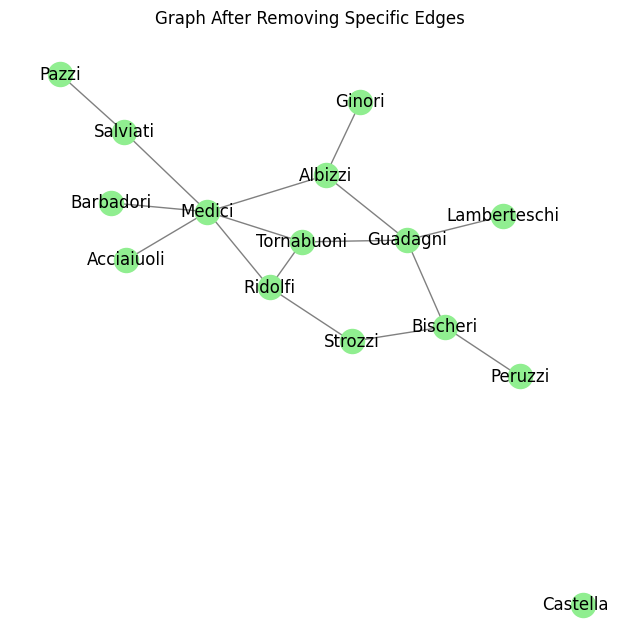

In [ ]:

# Plot graph after removing edges
plt.figure(figsize=(6, 6))
nx.draw(G, with_labels=True, node_color='lightgreen', edge_color='gray')
plt.title("Graph After Removing Specific Edges")
plt.show()


In [ ]:


# Extract edges and non-edges
edges = list(G.edges())
non_edges = list(combinations(G.nodes(), 2))
non_edges = [pair for pair in non_edges if pair not in edges and pair[::-1] not in edges]

# Split into training and testing sets
train_edges, test_edges = train_test_split(edges, test_size=0.3, random_state=42)
train_graph = nx.Graph()
train_graph.add_nodes_from(G.nodes())  # Preserve all nodes
train_graph.add_edges_from(train_edges)

# Function to compute link prediction scores
import networkx as nx
import numpy as np

def compute_scores(graph, test_set, metric):
    scores = []
    for u, v in test_set:
        if u not in graph or v not in graph:
            scores.append(0)  # Assign a default score if nodes are missing
            continue

        if metric == "adamic_adar":
            score = sum(1 / np.log(graph.degree(w)) for w in nx.common_neighbors(graph, u, v) if graph.degree(w) > 1)
        elif metric == "jaccard":
            neighbors_u = set(graph.neighbors(u))
            neighbors_v = set(graph.neighbors(v))
            score = len(neighbors_u & neighbors_v) / len(neighbors_u | neighbors_v) if len(neighbors_u | neighbors_v) > 0 else 0
        elif metric == "preferential_attachment":
            score = graph.degree(u) * graph.degree(v)
        elif metric == "common_neighbors":
            score = len(list(nx.common_neighbors(graph, u, v)))
        elif metric == "salton_index":
            neighbors_u = set(graph.neighbors(u))
            neighbors_v = set(graph.neighbors(v))
            denominator = np.sqrt(len(neighbors_u) * len(neighbors_v))
            score = len(neighbors_u & neighbors_v) / denominator if denominator > 0 else 0
        elif metric == "hub_promoted_index":
            neighbors_u = set(graph.neighbors(u))
            neighbors_v = set(graph.neighbors(v))
            min_degree = min(len(neighbors_u), len(neighbors_v))
            score = len(neighbors_u & neighbors_v) / min_degree if min_degree > 0 else 0
        else:
            raise ValueError("Unknown metric")

        scores.append(score)

    return np.array(scores)


# Compute scores
adamic_adar_scores = compute_scores(train_graph, test_edges, "adamic_adar")
jaccard_scores = compute_scores(train_graph, test_edges, "jaccard")
pref_attach_scores = compute_scores(train_graph, test_edges, "preferential_attachment")
cn_scores = compute_scores(train_graph, test_edges, "common_neighbors")
salton_scores = compute_scores(train_graph, test_edges, "salton_index")
hpi_scores = compute_scores(train_graph, test_edges, "hub_promoted_index")


# Generate ground truth labels
ground_truth = [1] * len(test_edges) + [0] * len(test_edges)
random_non_edges = np.random.choice(len(non_edges), len(test_edges), replace=False)
test_non_edges = [non_edges[i] for i in random_non_edges]

# Compute scores for non-edges
adamic_adar_scores = np.concatenate([adamic_adar_scores, compute_scores(train_graph, test_non_edges, "adamic_adar")])
jaccard_scores = np.concatenate([jaccard_scores, compute_scores(train_graph, test_non_edges, "jaccard")])
pref_attach_scores = np.concatenate([pref_attach_scores, compute_scores(train_graph, test_non_edges, "preferential_attachment")])
cn_scores = np.concatenate([cn_scores, compute_scores(train_graph, test_non_edges, "common_neighbors")])
salton_scores = np.concatenate([salton_scores, compute_scores(train_graph, test_non_edges, "salton_index")])
hpi_scores = np.concatenate([hpi_scores, compute_scores(train_graph, test_non_edges, "hub_promoted_index")])


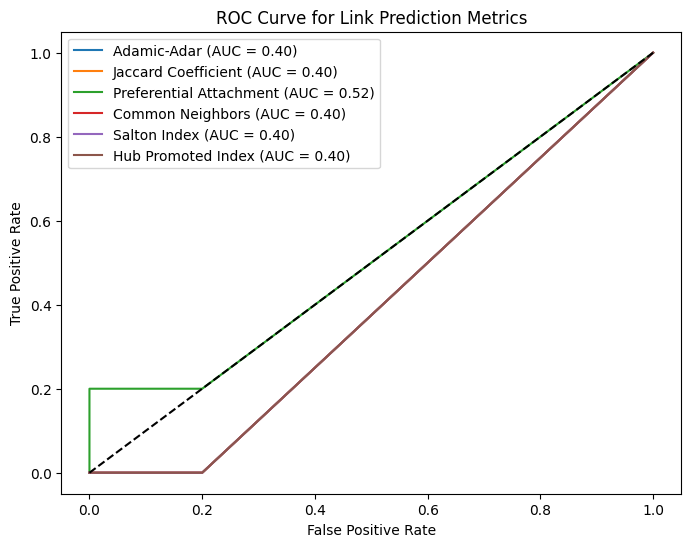

In [ ]:

# Function to plot ROC curve
def plot_roc_curve(y_true, y_scores, method):
    fpr, tpr, _ = roc_curve(y_true, y_scores)
    roc_auc = auc(fpr, tpr)
    plt.plot(fpr, tpr, label=f'{method} (AUC = {roc_auc:.2f})')

# Plot all ROC curves
plt.figure(figsize=(8, 6))

plot_roc_curve(ground_truth, adamic_adar_scores, "Adamic-Adar")
plot_roc_curve(ground_truth, jaccard_scores, "Jaccard Coefficient")
plot_roc_curve(ground_truth, pref_attach_scores, "Preferential Attachment")
plot_roc_curve(ground_truth, cn_scores, "Common Neighbors")
plot_roc_curve(ground_truth, salton_scores, "Salton Index")
plot_roc_curve(ground_truth, hpi_scores, "Hub Promoted Index")

# Random classifier line
plt.plot([0, 1], [0, 1], 'k--')

# Plot labels and title
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.title("ROC Curve for Link Prediction Metrics")
plt.legend()
plt.show()


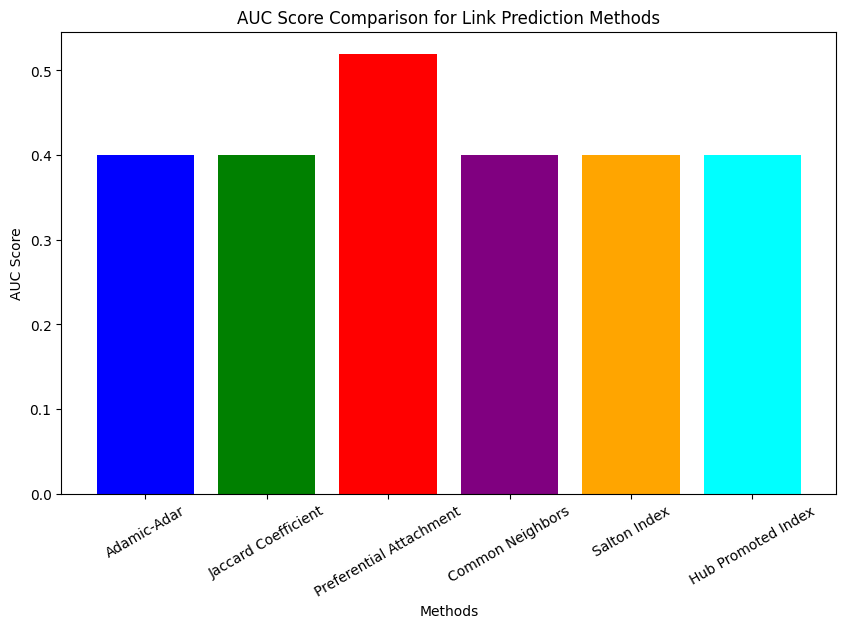

In [ ]:


import numpy as np
import matplotlib.pyplot as plt
from sklearn.metrics import roc_curve, auc

# Compute AUC scores for all methods
auc_scores = {
    "Adamic-Adar": auc(roc_curve(ground_truth, adamic_adar_scores)[0], roc_curve(ground_truth, adamic_adar_scores)[1]),
    "Jaccard Coefficient": auc(roc_curve(ground_truth, jaccard_scores)[0], roc_curve(ground_truth, jaccard_scores)[1]),
    "Preferential Attachment": auc(roc_curve(ground_truth, pref_attach_scores)[0], roc_curve(ground_truth, pref_attach_scores)[1]),
    "Common Neighbors": auc(roc_curve(ground_truth, cn_scores)[0], roc_curve(ground_truth, cn_scores)[1]),
    "Salton Index": auc(roc_curve(ground_truth, salton_scores)[0], roc_curve(ground_truth, salton_scores)[1]),
    "Hub Promoted Index": auc(roc_curve(ground_truth, hpi_scores)[0], roc_curve(ground_truth, hpi_scores)[1])
}

# Extract methods and corresponding AUC scores
methods = list(auc_scores.keys())
scores = list(auc_scores.values())

# Plot bar graph
plt.figure(figsize=(10, 6))
plt.bar(methods, scores, color=["blue", "green", "red", "purple", "orange", "cyan"])
plt.xlabel("Methods")
plt.ylabel("AUC Score")
plt.title("AUC Score Comparison for Link Prediction Methods")
plt.xticks(rotation=30)  # Rotate labels for better readability
plt.show()
